In [3]:
Задано набір даних (див. індивідуальний варіант).
Необхідно, використовуючи бібліотеки Python, завантажити цей набір у DataFrame і провести його первинний статистичний аналіз з подальшим відновленням розподілу, для чого: 
+    1. Відобразити перші та останні декілька рядків набору даних, переконатися, що набір завантажений без помилок. 
+    2. Проаналізувати тип кожного показника з набору даних (вручну, а не програмно). 
+    3. Вивести у вигляді таблиці та проаналізувати основні статистичні характеристики кожного показника. 
+    Для кількісних показників – це середнє, медіана, середньоквадратичне відхилення, мінімум, максимум; також у таблицю окремими рядками додати 95% довірчі інтервали для середнього, 
+    медіани і середньоквадратичного відхилення. 
+    Для якісних показників вивести кількість унікальних значень, самі значення з частотами. 
+    4. Якщо в даних є пропущені значення, то вилучити усі рядки з пропусками або заповнити пропуски середнім/медіаною/модою відповідного стовпця. 
+    5. Для кожного показника, який можна розглядати як дискретну випадкову величину, побудувати графік функції імовірностей. 
+    6. Для кожного показника, який можна розглядати як неперервну випадкову величину, побудувати гістограму та ядерну оцінку функції щільності 
+    (який розподіл за ними ідентифікується? чи однорідні дані?). 
+    7. Для кожного показника, який можна розглядати як неперервну випадкову величину, провести ідентифікацію нормального розподілу, а також перевірити його вірогідність. Для цього:
+         ще раз подивитися на гістограму та ядерну оцінку функції щільності (чи ідентифікується на їх основі нормальний розподіл?);
+         підрахувати для показника коефіцієнти асиметрії та ексцесу та перевірити гіпотези про їх рівність нулю (чи приймаються ці гіпотези для обох коефіцієнтів?);
+         побудувати ймовірнісний папір нормального розподілу і відобразити на ньому вибіркові дані (чи викладаються дані на папері в пряму?); 
+         перевірити вірогідність нормального розподілу за допомогою критерію Шапіро–Уілка. 
+    8. Для кожного показника, розподіл якого за результатами попереднього пункту відмінний від нормального, провести логарифмування і перевірити,
+    чи ідентифікується за перетвореним показником нормальний розподіл, чи став розподіл більш симетричним та схожим на нормальний. 
    9. Для кожного неперервного показника відновити його розподіл: 
         висунути припущення про можливі закони розподілу (мінімум 3 варіанти); 
         перевірити вірогідність цих розподілів за допомогою критерію згоди Колмогорова; 
        для наочності та полегшення аналізу доцільно побудувати таблицю, в якій вивести p значення критерію Колмогорова для кожного розподілу та кожного показника; 
         для найбільш вірогідного розподілу вивести на екран знайдені оцінки параметрів, відобразити графік відновленої функції щільності розподілу разом із гістограмою, 
        графік відновленої функції розподілу разом з графіком емпіричної функції розподілу, ймовірнісний папір цього розподілу разом з теоретичною лінією.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sb
import math

In [28]:
df = pd.read_csv('Boston.csv', delimiter=',',header=None, skiprows=1)
                 #  dtype={'0':'float64', '1':'float64', '2':'float64', '3':'int64', '4':'float64', '5':'float64', '6':'float64', '7':'float64',
                 #  '8':'int64', '9':'int64', '10':'float64', '11':'float64', '12':'float64', '13':'float64'}
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# Переменные по порядку:
#
# CRIM    КІЛЬКІСНА НЕПЕРЕРВНА  0 Уровень преступности на душу населения по городам 
# ZN      КІЛЬКІСНА НЕПЕРЕРВНА  1 Доля земли под жилую застройку зонирована под участки площадью более 25000 кв. футов. 
# INDUS   КІЛЬКІСНА НЕПЕРЕРВНА  2 Доля акров, не относящихся к розничной торговле, на город 
# CHAS    ЯКІСНА БІНАРНА        3 Фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае)
# NOX     КІЛЬКІСНА НЕПЕРЕРВНА  4 Концентрация оксидов азота NOX (частей на 10 миллионов) 
# RM      КІЛЬКІСНА НЕПЕРЕРВНА  5 Среднее количество комнат в доме
# AGE     КІЛЬКІСНА НЕПЕРЕРВНА  6 Доля домов, построенных до 1940 года, занимаемых владельцами 
# DIS     КІЛЬКІСНА НЕПЕРЕРВНА  7 Расстояние до пяти бостонских центров занятости 
# RAD     КІЛЬКІСНА ДИСКРЕТНА   8 Индекс доступности радиальных автомобильных дорог РАД
# TAX     КІЛЬКІСНА НЕПЕРЕРВНА  9 Полная ставка налога на имущество за 10000 долларов США.
# PTRATIO КІЛЬКІСНА НЕПЕРЕРВНА  10 Соотношение учеников и учителей PTRATIO по городам
# BLACK   КІЛЬКІСНА НЕПЕРЕРВНА  11 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам.
# LSTAT%  КІЛЬКІСНА НЕПЕРЕРВНА  12 Более низкий статус населения
# MEDV    КІЛЬКІСНА НЕПЕРЕРВНА  13 Средняя стоимость частных домов в 1000 долларов

In [19]:
# 4. Якщо в даних є пропущені значення, то вилучити усі рядки з пропусками або заповнити пропуски середнім/медіаною/модою відповідного стовпця. 

df.fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [14]:
def mean_int(data) :
    alpha = 0.05
    quantile = ss.norm.ppf(1-alpha/2)
    size = data.size
    mean = data.mean()
    std = data.std(ddof = 1)
    mean_start = mean - quantile * std / (size**0.5)
    mean_end = mean + quantile * std / (size**0.5)
    return '[%6.3f ; %6.3f]' % (mean_start, mean_end)

def median_int(data) :
    alpha = 0.05
    quantile = ss.norm.ppf(1-alpha/2)
    size = data.size
    data2 = sorted(data)
    if size % 2 == 0:
        median = (data2[int(size / 2)] + data2[int(size / 2 +1)])/2
    else:  
        median = data2[(int((size + 1) / 2))]  
    j = int(size / 2 - quantile * (size**0.5) / 2)
    k = int(size / 2 + 1 + quantile * (size**0.5) / 2)
    median_l = data2[j]
    median_u = data2[k]
    return '[%6.3f ; %6.3f]' % (median_l, median_u)

def std_int(data) :
    alpha = 0.05
    size = data.size
    std = data.std(ddof = 1)
    quantile = ss.t.ppf(1-alpha/2, size-1)
    std_std = std / math.sqrt(2 * size)
    std_start = std - quantile * std_std
    std_end = std + quantile * std_std
    return '[%6.3f ; %6.3f]' % (std_start, std_end)


In [5]:
# 3. Вивести у вигляді таблиці та проаналізувати основні статистичні характеристики кожного показника. 
#    Для кількісних показників – це середнє, медіана, середньоквадратичне відхилення, мінімум, максимум; 
#    також у таблицю окремими рядками додати 95% довірчі інтервали для середнього, медіани і середньоквадратичного відхилення. 

table = pd.DataFrame(columns={"Параметр":1,"0":2,"1":3,"2":4,"4":5,"5":6,"6":7,"7":8,"8":9,"9":10,"10":11,"11":12,"12":13,"13":14})
table.loc[len(table)] = ["mean", np.mean(df[0]), np.mean(df[1]), np.mean(df[2]), np.mean(df[4]), np.mean(df[5]), np.mean(df[6]), np.mean(df[7]), np.mean(df[8]), np.mean(df[9]), np.mean(df[10]), np.mean(df[11]), np.mean(df[12]), np.mean(df[13])]
table.loc[len(table)] = ["mean 95% int", mean_int(df[0]), mean_int(df[1]), mean_int(df[2]), mean_int(df[4]), mean_int(df[5]), mean_int(df[6]), mean_int(df[7]), mean_int(df[8]), mean_int(df[9]), mean_int(df[10]), mean_int(df[11]), mean_int(df[12]), mean_int(df[13])]
table.loc[len(table)] = ["median", np.median(df[0]), np.median(df[1]), np.median(df[2]), np.median(df[4]), np.median(df[5]), np.median(df[6]), np.median(df[7]), np.median(df[8]), np.median(df[9]), np.median(df[10]), np.median(df[11]), np.median(df[12]), np.median(df[13])]
table.loc[len(table)] = ["median 95% int", median_int(df[0]), median_int(df[1]), median_int(df[2]), median_int(df[4]), median_int(df[5]), median_int(df[6]), median_int(df[7]), median_int(df[8]), median_int(df[9]), median_int(df[10]), median_int(df[11]), median_int(df[12]), median_int(df[13])]
table.loc[len(table)] = ["std", np.std(df[0]), np.std(df[1]), np.std(df[2]), np.std(df[4]), np.std(df[5]), np.std(df[6]), np.std(df[7]), np.std(df[8]), np.std(df[9]), np.std(df[10]), np.std(df[11]), np.std(df[12]), np.std(df[13])]
table.loc[len(table)] = ["std 95% int", std_int(df[0]), std_int(df[1]), std_int(df[2]), std_int(df[4]), std_int(df[5]), std_int(df[6]), std_int(df[7]), std_int(df[8]), std_int(df[9]), std_int(df[10]), std_int(df[11]), std_int(df[12]), std_int(df[13])]
table.loc[len(table)] = ["min", np.min(df[0]), np.min(df[1]), np.min(df[2]), np.min(df[4]), np.min(df[5]), np.min(df[6]), np.min(df[7]), np.min(df[8]), np.min(df[9]), np.min(df[10]), np.min(df[11]), np.min(df[12]), np.min(df[13])]
table.loc[len(table)] = ["max", np.max(df[0]), np.max(df[1]), np.max(df[2]), np.max(df[4]), np.max(df[5]), np.max(df[6]), np.max(df[7]), np.max(df[8]), np.max(df[9]), np.max(df[10]), np.max(df[11]), np.max(df[12]), np.max(df[13])]
display(table.style.hide_index())

Параметр,0,1,2,4,5,6,7,8,9,10,11,12,13
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
mean 95% int,[ 2.864 ; 4.363],[ 9.332 ; 13.396],[10.539 ; 11.735],[ 0.545 ; 0.565],[ 6.223 ; 6.346],[66.122 ; 71.028],[ 3.612 ; 3.979],[ 8.791 ; 10.308],[393.552 ; 422.922],[18.267 ; 18.644],[348.719 ; 364.629],[12.031 ; 13.275],[21.731 ; 23.334]
median,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
median 95% int,[ 0.198 ; 0.349],[ 0.000 ; 0.000],[ 8.140 ; 10.010],[ 0.520 ; 0.544],[ 6.151 ; 6.273],[72.500 ; 82.600],[ 2.872 ; 3.495],[ 5.000 ; 5.000],[311.000 ; 384.000],[18.600 ; 19.200],[390.430 ; 392.740],[10.300 ; 12.340],[20.500 ; 21.900]
std,8.593041,23.299396,6.853571,0.115763,0.701923,28.121033,2.103628,8.698651,168.370495,2.162805,91.204607,7.134002,9.188012
std 95% int,[ 8.070 ; 9.133],[21.882 ; 24.763],[ 6.437 ; 7.284],[ 0.109 ; 0.123],[ 0.659 ; 0.746],[26.410 ; 29.887],[ 1.976 ; 2.236],[ 8.170 ; 9.245],[158.128 ; 178.946],[ 2.031 ; 2.299],[85.657 ; 96.933],[ 6.700 ; 7.582],[ 8.629 ; 9.765]
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1,187,12.600000,0.320000,1.730000,5.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24,711,22.000000,396.900000,37.970000,50.000000


In [6]:
# 3. Вивести у вигляді таблиці та проаналізувати основні статистичні характеристики кожного показника. 
#    Для якісних показників вивести кількість унікальних значень, самі значення з частотами. 

unique0 = (df[3] == 0).sum()
unique1 = (df[3] == 1).sum()
for0 = unique0 / df[3].size
for1 = unique1 / df[3].size

table = pd.DataFrame(columns={"Значення":1,"Кількість":2,"Частота":3})
table.loc[len(table)] = ["0", unique0, for0]
table.loc[len(table)] = ["1", unique1, for1]
display(table.style.hide_index())

Значення,Кількість,Частота
0,471,0.930830
1,35,0.069170


In [29]:
#    5. Для кожного показника, який можна розглядати як дискретну випадкову величину, побудувати графік функції імовірностей. 

df[8].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: 8, dtype: int64

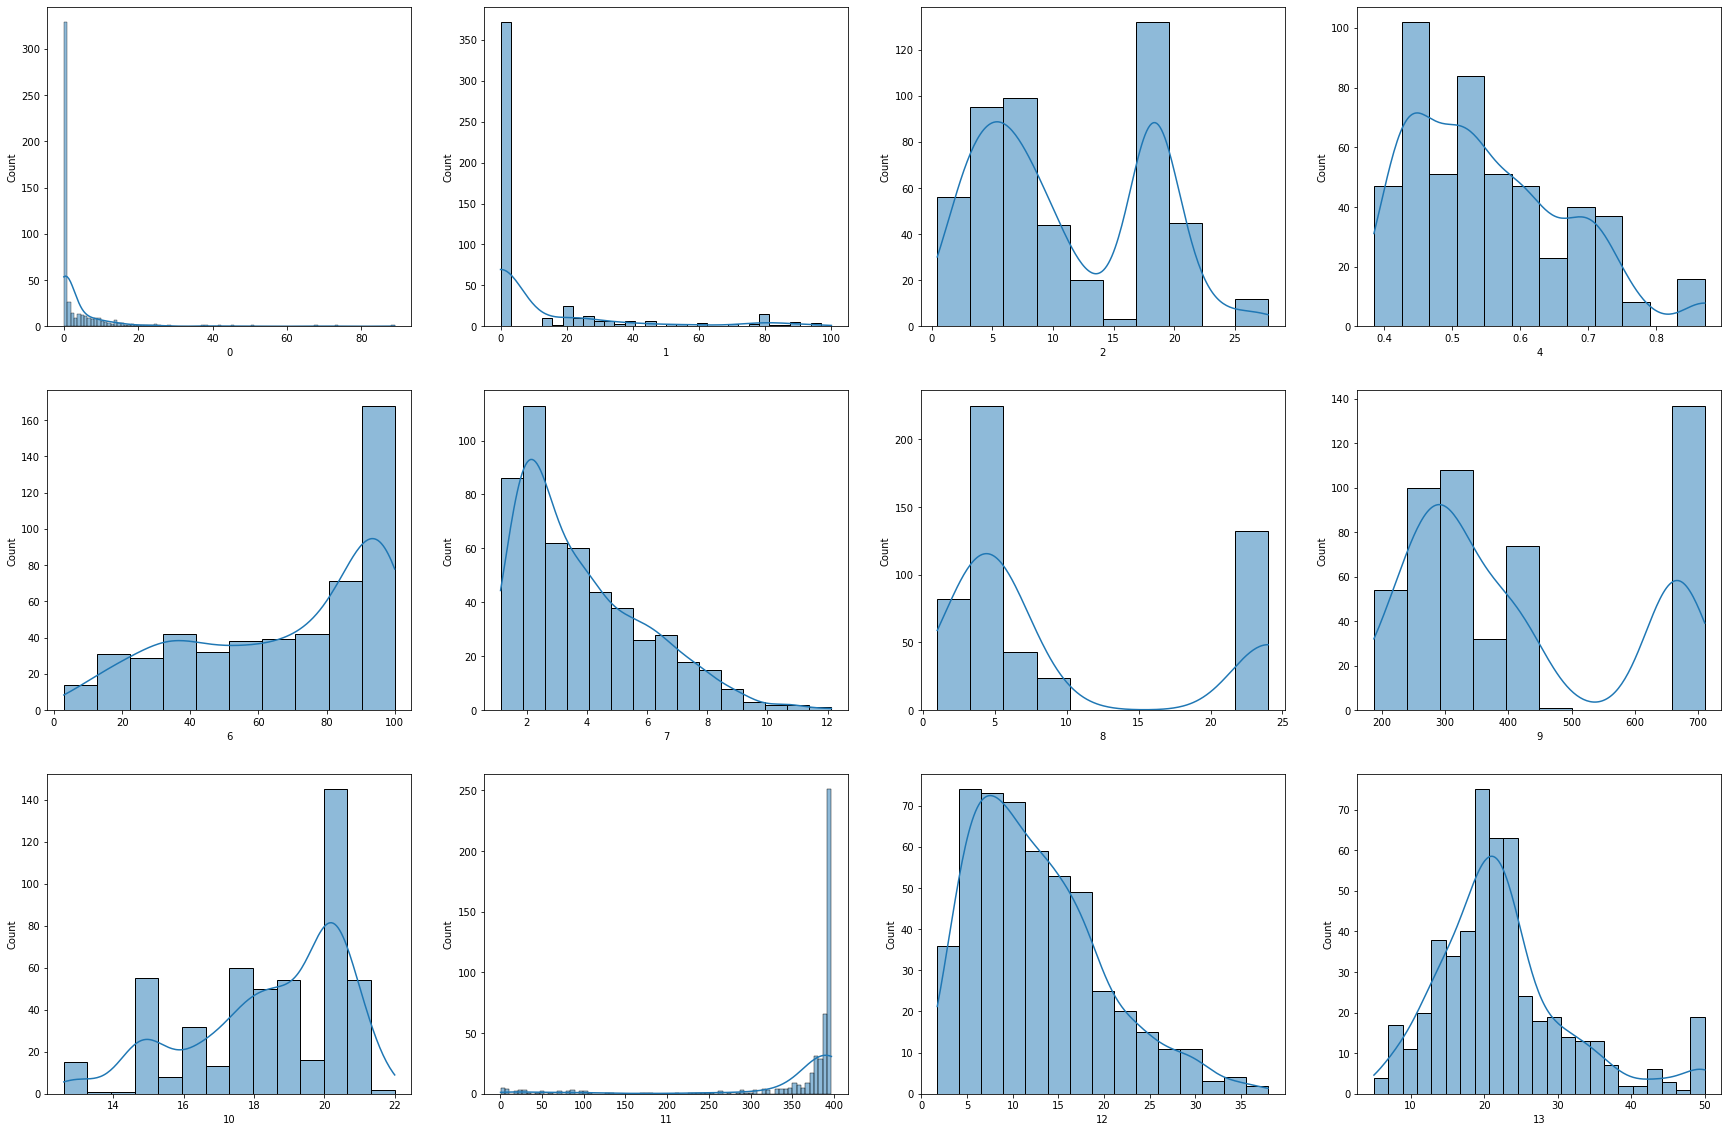

In [8]:
#    6. Для кожного показника, який можна розглядати як неперервну випадкову величину, побудувати гістограму та ядерну оцінку функції щільності 
#   (який розподіл за ними ідентифікується? чи однорідні дані?).
plt.figure(figsize=(30,20))

plt.subplot(3, 4, 1)
sb.histplot(df[0], kde = True)
# Унімодальна (Експонеціальний, Вейбулла, Паретто)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 2)
sb.histplot(df[1], kde = True)
# Унімодальна (Експонеціальний, Вейбулла, Паретто)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 3)
sb.histplot(df[2], kde = True)
# Багатомодальна 
# Дані не однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 4)
sb.histplot(df[4], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані однорідні
# Нормальний розподіл не ідентифікується

#-----------------------------------
plt.subplot(3, 4, 5)
sb.histplot(df[6], kde = True)
# Одномодальна з правою асиметрією (Вейбулла, Екстремальний)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 6)
sb.histplot(df[7], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 7)
sb.histplot(df[8], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані не однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 8)
sb.histplot(df[9], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані не однорідні
# Нормальний розподіл не ідентифікується

#-----------------------------------
plt.subplot(3, 4, 9)
sb.histplot(df[10], kde = True)
# Одномодальна з правою асиметрією (Вейбулла, Екстремальний)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 10)
sb.histplot(df[11], kde = True)
# Унімодальна (Експонеціальний, Вейбулла, Паретто)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 11)
sb.histplot(df[12], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані однорідні
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 12)
sb.histplot(df[13], kde = True)
# Одномодальна з лівою асиметрією (Вейбулла, Екстремальний, Релея, Логарифмічно-нормальний)
# Дані не однорідні
# Нормальний розподіл не ідентифікується

plt.show()

кегненге

In [9]:
#    7. Для кожного показника, який можна розглядати як неперервну випадкову величину, провести ідентифікацію нормального розподілу, а також перевірити його вірогідність. Для цього:
#         ще раз подивитися на гістограму та ядерну оцінку функції щільності (чи ідентифікується на їх основі нормальний розподіл?);
#         підрахувати для показника коефіцієнти асиметрії та ексцесу та перевірити гіпотези про їх рівність нулю (чи приймаються ці гіпотези для обох коефіцієнтів?);
#         перевірити вірогідність нормального розподілу за допомогою критерію Шапіро–Уілка. 

def my_coef(data, value):
    print("\n --------------------------- "+ value +" --------------------------- ")
    alpha = 0.05
    size = data.size
    
    A = ss.skew(data)
    sigmaA = math.sqrt((6 * (size - 2)) / ((size + 1) * (size + 3)))
    uA = (A - 0) / sigmaA
    
    E = ss.kurtosis(data)
    sigmaE = math.sqrt((24 * size * (size - 2) * (size - 3))/(pow((size + 1), 2) * (size + 3 * (size + 5))))
    uE = (E - 0) / sigmaE
    
    quantile = ss.norm.ppf(1-alpha/2)
    absUA = abs(uA)
    absUE = abs(uE)
    
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["A", A]
    table.loc[len(table)] = ["E", E]
    table.loc[len(table)] = ["ABS uA", absUA]
    table.loc[len(table)] = ["ABS uE", absUE]
    table.loc[len(table)] = ["Quantile", quantile]
    table.loc[len(table)] = ["skewtest statistic", ss.skewtest(data).statistic]
    table.loc[len(table)] = ["skewtest pvalue", ss.skewtest(data).pvalue]
    table.loc[len(table)] = ["kurtosistest statistic", ss.kurtosistest(data).statistic]
    table.loc[len(table)] = ["kurtosistest pvalue", ss.kurtosistest(data).statistic]
    table.loc[len(table)] = ["normaltest statistic", ss.normaltest(data).statistic]
    table.loc[len(table)] = ["normaltest pvalue", ss.normaltest(data).statistic]
    table.loc[len(table)] = ["normaltest pvalue > alpha", "ідентифікується" if ss.normaltest(data)[1] > alpha else "не ідентифікується"]
    table.loc[len(table)] = ["shapiro statistic", ss.shapiro(data).statistic]
    table.loc[len(table)] = ["shapiro pvalue", ss.shapiro(data).statistic]
    table.loc[len(table)] = ["shapiro pvalue > alpha", "ідентифікується" if ss.shapiro(data)[1] > alpha else "не ідентифікується"]
    if absUA <= quantile and absUE <= quantile :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл ідентифікується"]
    else :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл не ідентифікується"]
    display(table.style.hide_index())
    return

my_coef(df[0],"0")
my_coef(df[1],"1")
my_coef(df[2],"2")
my_coef(df[4],"4")
my_coef(df[6],"6")
my_coef(df[7],"7")
my_coef(df[8],"8")
my_coef(df[9],"9")
my_coef(df[10],"10")
my_coef(df[11],"11")
my_coef(df[12],"12")
my_coef(df[13],"13")


 --------------------------- 0 --------------------------- 


Значення,Параметр
A,5.207652
E,36.752786
ABS uA,48.107630
ABS uE,15.164451
Quantile,1.959964
skewtest statistic,19.671550
skewtest pvalue,0.000000
kurtosistest statistic,13.258146
kurtosistest pvalue,13.258146
normaltest statistic,562.748294



 --------------------------- 1 --------------------------- 


Значення,Параметр
A,2.219063
E,3.979949
ABS uA,20.499422
ABS uE,1.642154
Quantile,1.959964
skewtest statistic,13.252038
skewtest pvalue,0.000000
kurtosistest statistic,7.256289
kurtosistest pvalue,7.256289
normaltest statistic,228.270250



 --------------------------- 2 --------------------------- 


Значення,Параметр
A,0.294146
E,-1.233218
ABS uA,2.717286
ABS uE,0.508834
Quantile,1.959964
skewtest statistic,2.686151
skewtest pvalue,0.007228
kurtosistest statistic,-20.319456
kurtosistest pvalue,-20.319456
normaltest statistic,420.095708



 --------------------------- 4 --------------------------- 


Значення,Параметр
A,0.727144
E,-0.075864
ABS uA,6.717265
ABS uE,0.031302
Quantile,1.959964
skewtest statistic,6.120889
skewtest pvalue,0.000000
kurtosistest statistic,-0.210735
kurtosistest pvalue,-0.210735
normaltest statistic,37.509689



 --------------------------- 6 --------------------------- 


Значення,Параметр
A,-0.597186
E,-0.970014
ABS uA,5.516725
ABS uE,0.400234
Quantile,1.959964
skewtest statistic,-5.172487
skewtest pvalue,0.000000
kurtosistest statistic,-9.349374
kurtosistest pvalue,-9.349374
normaltest statistic,114.165419



 --------------------------- 7 --------------------------- 


Значення,Параметр
A,1.008779
E,0.471299
ABS uA,9.318970
ABS uE,0.194461
Quantile,1.959964
skewtest statistic,7.941451
skewtest pvalue,0.000000
kurtosistest statistic,1.969360
kurtosistest pvalue,1.969360
normaltest statistic,66.945024



 --------------------------- 8 --------------------------- 


Значення,Параметр
A,1.001833
E,-0.870521
ABS uA,9.254810
ABS uE,0.359183
Quantile,1.959964
skewtest statistic,7.900128
skewtest pvalue,0.000000
kurtosistest statistic,-7.384606
kurtosistest pvalue,-7.384606
normaltest statistic,116.944430



 --------------------------- 9 --------------------------- 


Значення,Параметр
A,0.667968
E,-1.142985
ABS uA,6.170606
ABS uE,0.471603
Quantile,1.959964
skewtest statistic,5.697943
skewtest pvalue,0.000000
kurtosistest statistic,-14.857656
kurtosistest pvalue,-14.857656
normaltest statistic,253.216488



 --------------------------- 10 --------------------------- 


Значення,Параметр
A,-0.799945
E,-0.294116
ABS uA,7.389786
ABS uE,0.121354
Quantile,1.959964
skewtest statistic,-6.621242
skewtest pvalue,0.000000
kurtosistest statistic,-1.450558
kurtosistest pvalue,-1.450558
normaltest statistic,45.944962



 --------------------------- 11 --------------------------- 


Значення,Параметр
A,-2.881798
E,7.143769
ABS uA,26.621687
ABS uE,2.947568
Quantile,1.959964
skewtest statistic,-15.180308
skewtest pvalue,0.000000
kurtosistest statistic,9.045121
kurtosistest pvalue,9.045121
normaltest statistic,312.255964



 --------------------------- 12 --------------------------- 


Значення,Параметр
A,0.903771
E,0.476545
ABS uA,8.348919
ABS uE,0.196626
Quantile,1.959964
skewtest statistic,7.298167
skewtest pvalue,0.000000
kurtosistest statistic,1.985993
kurtosistest pvalue,1.985993
normaltest statistic,57.207416



 --------------------------- 13 --------------------------- 


Значення,Параметр
A,1.104811
E,1.468629
ABS uA,10.206102
ABS uE,0.605966
Quantile,1.959964
skewtest statistic,8.495941
skewtest pvalue,0.000000
kurtosistest statistic,4.335168
kurtosistest pvalue,4.335168
normaltest statistic,90.974687


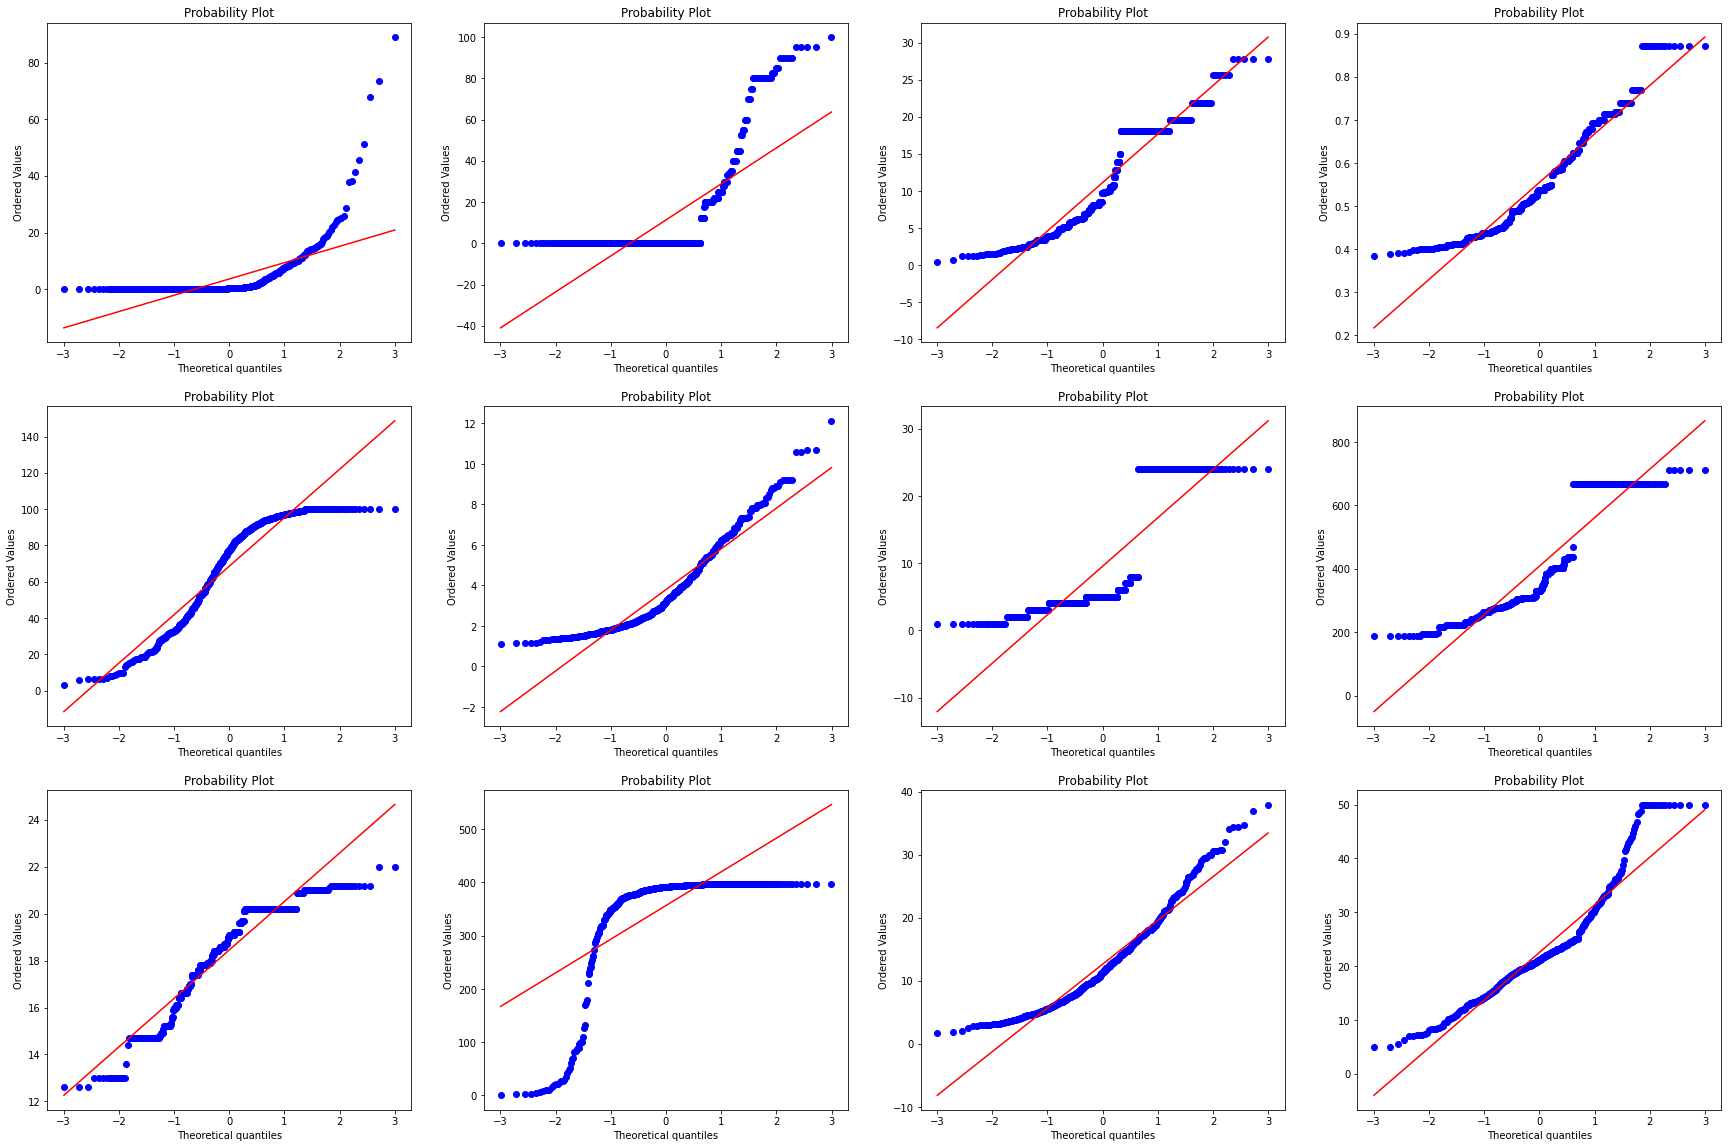

In [10]:
#      побудувати ймовірнісний папір нормального розподілу і відобразити на ньому вибіркові дані (чи викладаються дані на папері в пряму?); 

plt.figure(figsize=(30,20))

plt.subplot(3, 4, 1)
ss.probplot(df[0], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 2)
ss.probplot(df[1], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 3)
ss.probplot(df[2], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 4)
ss.probplot(df[4], plot=plt)
# Нормальний розподіл не ідентифікується

#-----------------------------------
plt.subplot(3, 4, 5)
ss.probplot(df[6], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 6)
ss.probplot(df[7], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 7)
ss.probplot(df[8], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 8)
ss.probplot(df[9], plot=plt)
# Нормальний розподіл не ідентифікується

#-----------------------------------
plt.subplot(3, 4, 9)
ss.probplot(df[10], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 10)
ss.probplot(df[11], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 11)
ss.probplot(df[12], plot=plt)
# Нормальний розподіл не ідентифікується

plt.subplot(3, 4, 12)
ss.probplot(df[13], plot=plt)
# Нормальний розподіл не ідентифікується

plt.show()


 --------------------------- 0 --------------------------- 


Значення,Параметр
A,0.404730
E,-1.011582
ABS uA,3.738846
ABS uE,0.417386
Quantile,1.959964
skewtest statistic,3.635969
skewtest pvalue,0.000277
kurtosistest statistic,-10.361333
kurtosistest pvalue,-10.361333
normaltest statistic,120.577494


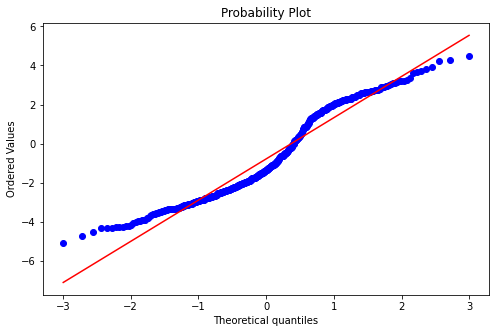


 --------------------------- 1 --------------------------- 


<ipython-input-136-b34d5673b27a>:5: RuntimeWarning: divide by zero encountered in log
  newData = pd.Series((np.log(data.iloc[i])) for i in range(data.size))
D:\Program files\Anaconda\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


Значення,Параметр
A,nan
E,nan
ABS uA,nan
ABS uE,nan
Quantile,1.959964
skewtest statistic,nan
skewtest pvalue,nan
kurtosistest statistic,nan
kurtosistest pvalue,nan
normaltest statistic,nan


D:\Program files\Anaconda\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


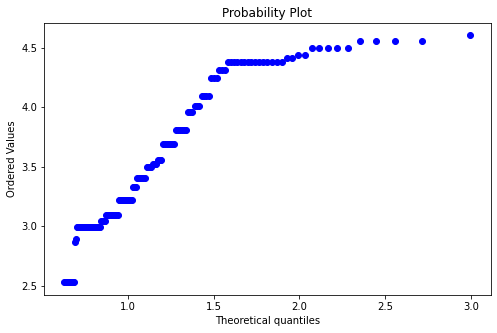


 --------------------------- 2 --------------------------- 


Значення,Параметр
A,-0.641218
E,-0.295367
ABS uA,5.923487
ABS uE,0.121871
Quantile,1.959964
skewtest statistic,-5.501879
skewtest pvalue,0.000000
kurtosistest statistic,-1.458590
kurtosistest pvalue,-1.458590
normaltest statistic,32.398159


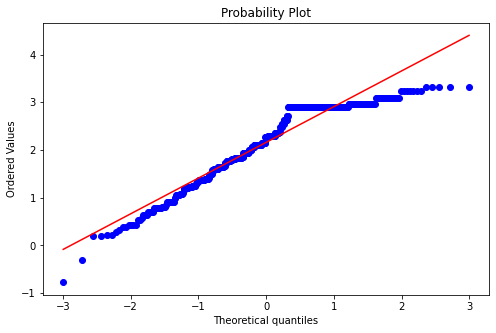


 --------------------------- 4 --------------------------- 


Значення,Параметр
A,0.356718
E,-0.732553
ABS uA,3.295317
ABS uE,0.302257
Quantile,1.959964
skewtest statistic,3.229106
skewtest pvalue,0.001242
kurtosistest statistic,-5.356740
kurtosistest pvalue,-5.356740
normaltest statistic,39.121797


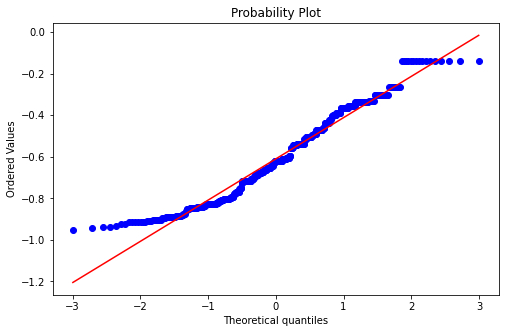


 --------------------------- 6 --------------------------- 


Значення,Параметр
A,-1.670684
E,2.907332
ABS uA,15.433562
ABS uE,1.199585
Quantile,1.959964
skewtest statistic,-11.229057
skewtest pvalue,0.000000
kurtosistest statistic,6.292803
kurtosistest pvalue,6.292803
normaltest statistic,165.691080


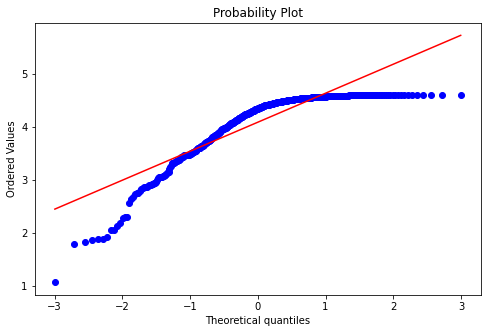


 --------------------------- 7 --------------------------- 


Значення,Параметр
A,0.152277
E,-0.988325
ABS uA,1.406716
ABS uE,0.407790
Quantile,1.959964
skewtest statistic,1.410680
skewtest pvalue,0.158339
kurtosistest statistic,-9.778189
kurtosistest pvalue,-9.778189
normaltest statistic,97.603006


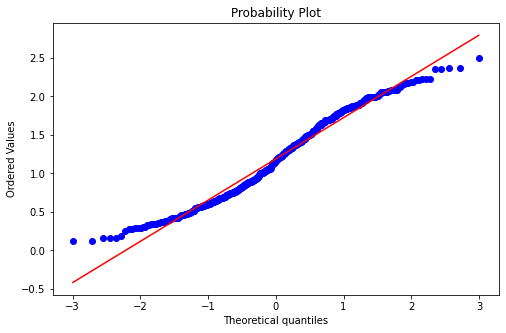


 --------------------------- 8 --------------------------- 


Значення,Параметр
A,0.285767
E,-0.635655
ABS uA,2.639877
ABS uE,0.262276
Quantile,1.959964
skewtest statistic,2.612421
skewtest pvalue,0.008990
kurtosistest statistic,-4.241647
kurtosistest pvalue,-4.241647
normaltest statistic,24.816309


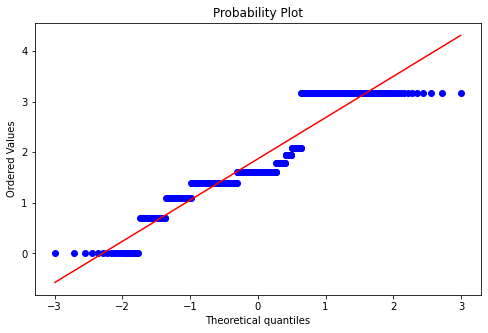


 --------------------------- 9 --------------------------- 


Значення,Параметр
A,0.329576
E,-1.171943
ABS uA,3.044581
ABS uE,0.483552
Quantile,1.959964
skewtest statistic,2.995281
skewtest pvalue,0.002742
kurtosistest statistic,-16.284785
kurtosistest pvalue,-16.284785
normaltest statistic,274.165930


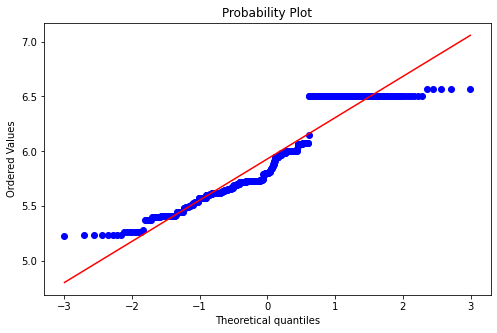


 --------------------------- 10 --------------------------- 


Значення,Параметр
A,-1.012612
E,0.225867
ABS uA,9.354381
ABS uE,0.093194
Quantile,1.959964
skewtest statistic,-7.964186
skewtest pvalue,0.000000
kurtosistest statistic,1.113635
kurtosistest pvalue,1.113635
normaltest statistic,64.668445


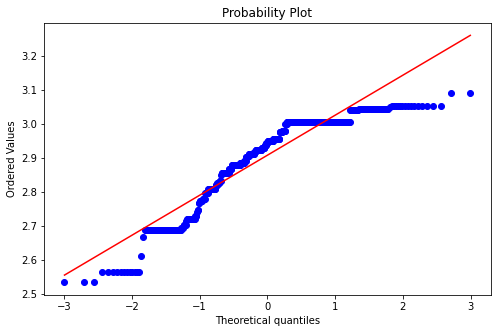


 --------------------------- 11 --------------------------- 


Значення,Параметр
A,-4.812677
E,26.451535
ABS uA,44.458900
ABS uE,10.914084
Quantile,1.959964
skewtest statistic,-19.066738
skewtest pvalue,0.000000
kurtosistest statistic,12.537753
kurtosistest pvalue,12.537753
normaltest statistic,520.735742


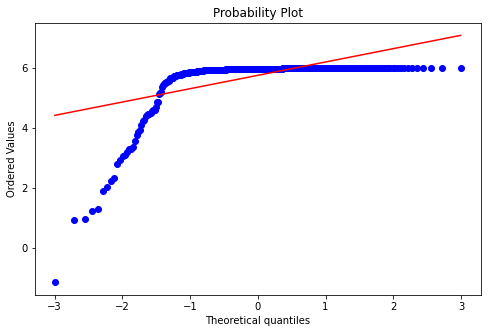


 --------------------------- 12 --------------------------- 


Значення,Параметр
A,-0.319282
E,-0.439059
ABS uA,2.949489
ABS uE,0.181159
Quantile,1.959964
skewtest statistic,-2.905912
skewtest pvalue,0.003662
kurtosistest statistic,-2.471249
kurtosistest pvalue,-2.471249
normaltest statistic,14.551398


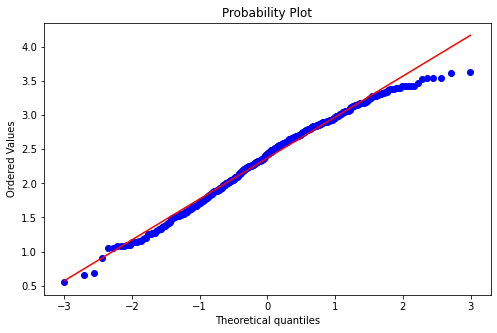


 --------------------------- 13 --------------------------- 


Значення,Параметр
A,-0.329341
E,0.787600
ABS uA,3.042413
ABS uE,0.324969
Quantile,1.959964
skewtest statistic,-2.993248
skewtest pvalue,0.002760
kurtosistest statistic,2.873758
kurtosistest pvalue,2.873758
normaltest statistic,17.218017


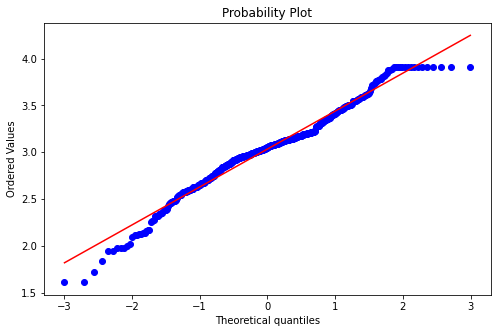

In [136]:
#    8. Для кожного показника, розподіл якого за результатами попереднього пункту відмінний від нормального, провести логарифмування і перевірити,
#    чи ідентифікується за перетвореним показником нормальний розподіл, чи став розподіл більш симетричним та схожим на нормальний.  

def my_log(data, value):
    newData = pd.Series((np.log(data.iloc[i])) for i in range(data.size))
    my_coef(newData, value)
    plt.figure(figsize=(8,5))
    ss.probplot(newData, plot=plt)
    plt.show()
    return

my_log(df[0],"0")
my_log(df[1],"1")
my_log(df[2],"2")
my_log(df[4],"4")
my_log(df[6],"6")
my_log(df[7],"7")
my_log(df[8],"8")
my_log(df[9],"9")
my_log(df[10],"10")
my_log(df[11],"11")
my_log(df[12],"12")
my_log(df[13],"13")

In [11]:
#    9. Для кожного неперервного показника відновити його розподіл: 
#         висунути припущення про можливі закони розподілу (мінімум 3 варіанти); 
#         перевірити вірогідність цих розподілів за допомогою критерію згоди Колмогорова; 
#        для наочності та полегшення аналізу доцільно побудувати таблицю, в якій вивести p значення критерію Колмогорова для кожного розподілу та кожного показника; 
#         для найбільш вірогідного розподілу вивести на екран знайдені оцінки параметрів, відобразити графік відновленої функції щільності розподілу разом із гістограмою, 
#        графік відновленої функції розподілу разом з графіком емпіричної функції розподілу, ймовірнісний папір цього розподілу разом з теоретичною лінією.

def my_norm(data,value) :
    print("\n --------------------------- "+ value +" norm --------------------------- ")
    alpha = 0.05
    m, delta = ss.norm.fit(data)
    stat, pvalue = ss.kstest(data, 'norm')
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["m", m]
    table.loc[len(table)] = ["delta", delta]
    table.loc[len(table)] = ["kstest statistics", stat]
    table.loc[len(table)] = ["kstest pvalue", pvalue]
    table.loc[len(table)] = ["kstest pvalue > alpha", "ідентифікується" if pvalue > alpha else "не ідентифікується"]
    display(table.style.hide_index())
    return

def my_expon(data,value) :
    print("\n --------------------------- "+ value +" exp --------------------------- ")
    alpha = 0.05
    a, b = ss.expon.fit(data)
    stat, pvalue = ss.kstest(data, 'expon')
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["a", a]
    table.loc[len(table)] = ["b", b]
    table.loc[len(table)] = ["kstest statistics", stat]
    table.loc[len(table)] = ["kstest pvalue", pvalue]
    table.loc[len(table)] = ["kstest pvalue > alpha", "ідентифікується" if pvalue > alpha else "не ідентифікується"]
    display(table.style.hide_index())
    return

def my_weibull(data,value) :
    print("\n --------------------------- "+ value +" weibull --------------------------- ")
    alpha = 0.05
    a = ss.weibull_min.fit(data)
    stat, pvalue = ss.kstest(data, 'weibull')
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["a", a]
    table.loc[len(table)] = ["kstest statistics", stat]
    table.loc[len(table)] = ["kstest pvalue", pvalue]
    table.loc[len(table)] = ["kstest pvalue > alpha", "ідентифікується" if pvalue > alpha else "не ідентифікується"]
    display(table.style.hide_index())
    return
 
my_norm(df[0],"0")
my_norm(df[1],"1")
my_norm(df[2],"2")
my_norm(df[4],"4")
my_norm(df[6],"6")
my_norm(df[7],"7")
my_norm(df[8],"8")
my_norm(df[9],"9")
my_norm(df[10],"10")
my_norm(df[11],"11")
my_norm(df[12],"12")
my_norm(df[13],"13")

my_expon(df[0],"0")
my_expon(df[1],"1")
my_expon(df[2],"2")
my_expon(df[4],"4")
my_expon(df[6],"6")
my_expon(df[7],"7")
my_expon(df[8],"8")
my_expon(df[9],"9")
my_expon(df[10],"10")
my_expon(df[11],"11")
my_expon(df[12],"12")
my_expon(df[13],"13")

my_weibull(df[0],"0")
my_weibull(df[1],"1")
my_weibull(df[2],"2")
my_weibull(df[4],"4")
my_weibull(df[6],"6")
my_weibull(df[7],"7")
my_weibull(df[8],"8")
my_weibull(df[9],"9")
my_weibull(df[10],"10")
my_weibull(df[11],"11")
my_weibull(df[12],"12")
my_weibull(df[13],"13")


 --------------------------- 0 norm --------------------------- 


Значення,Параметр
m,3.613524
delta,8.593041
kstest statistics,0.502521
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 1 norm --------------------------- 


Значення,Параметр
m,11.363636
delta,23.299396
kstest statistics,0.500000
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 2 norm --------------------------- 


Значення,Параметр
m,11.136779
delta,6.853571
kstest statistics,0.938259
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 4 norm --------------------------- 


Значення,Параметр
m,0.554695
delta,0.115763
kstest statistics,0.649881
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 6 norm --------------------------- 


Значення,Параметр
m,68.574901
delta,28.121033
kstest statistics,0.998134
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 7 norm --------------------------- 


Значення,Параметр
m,3.795043
delta,2.103628
kstest statistics,0.892129
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 8 norm --------------------------- 


Значення,Параметр
m,9.549407
delta,8.698651
kstest statistics,0.937724
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 9 norm --------------------------- 


Значення,Параметр
m,408.237154
delta,168.370495
kstest statistics,1.000000
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 10 norm --------------------------- 


Значення,Параметр
m,18.455534
delta,2.162805
kstest statistics,1.000000
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 11 norm --------------------------- 


Значення,Параметр
m,356.674032
delta,91.204607
kstest statistics,0.993839
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 12 norm --------------------------- 


Значення,Параметр
m,12.653063
delta,7.134002
kstest statistics,0.990043
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 13 norm --------------------------- 


Значення,Параметр
m,22.532806
delta,9.188012
kstest statistics,1.000000
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 0 exp --------------------------- 


Значення,Параметр
a,0.006320
b,3.607204
kstest statistics,0.280946
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 1 exp --------------------------- 


Значення,Параметр
a,0.000000
b,11.363636
kstest statistics,0.735178
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 2 exp --------------------------- 


Значення,Параметр
a,0.460000
b,10.676779
kstest statistics,0.853515
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 4 exp --------------------------- 


Значення,Параметр
a,0.385000
b,0.169695
kstest statistics,0.431393
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 6 exp --------------------------- 


Значення,Параметр
a,2.900000
b,65.674901
kstest statistics,0.995545
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 7 exp --------------------------- 


Значення,Параметр
a,1.129600
b,2.665443
kstest statistics,0.724675
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 8 exp --------------------------- 


Значення,Параметр
a,1.000000
b,8.549407
kstest statistics,0.863256
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 9 exp --------------------------- 


Значення,Параметр
a,187.000000
b,221.237154
kstest statistics,1.000000
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 10 exp --------------------------- 


Значення,Параметр
a,12.600000
b,5.855534
kstest statistics,0.999997
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 11 exp --------------------------- 


Значення,Параметр
a,0.320000
b,356.354032
kstest statistics,0.988863
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 12 exp --------------------------- 


Значення,Параметр
a,1.730000
b,10.923063
kstest statistics,0.935396
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 13 exp --------------------------- 


Значення,Параметр
a,5.000000
b,17.532806
kstest statistics,0.993262
kstest pvalue,0.000000
kstest pvalue > alpha,не ідентифікується



 --------------------------- 0 weibull --------------------------- 


AttributeError: module 'scipy.stats.distributions' has no attribute 'weibull'

In [30]:
ss.expon.fit(df[0])

(0.00632, 3.607203557312254)